In [2]:
import pandas as pd
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC



In [4]:
df = pd.read_csv('application_data.csv')
df2 = pd.read_csv('columns_description.csv',encoding='cp1252')

In [5]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df2.head(10)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [7]:
df.shape

(307511, 122)

In [8]:
df.size

37516342

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [11]:
df.dtypes


SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [12]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [13]:
len(list(df.columns))

122

## Missing Values

In [14]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [15]:
testando = list(df.isnull().sum())
print(testando)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 278, 1292, 0, 0, 0, 0, 0, 0, 0, 0, 0, 202929, 0, 0, 0, 0, 0, 0, 96391, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 173378, 660, 60965, 156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682, 156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682, 210295, 154297, 148431, 156341, 145755, 1021, 1021, 1021, 1021, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41519, 41519, 41519, 41519, 41519, 41519]


In [16]:
print(list(df.columns))

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [17]:
import seaborn as sns

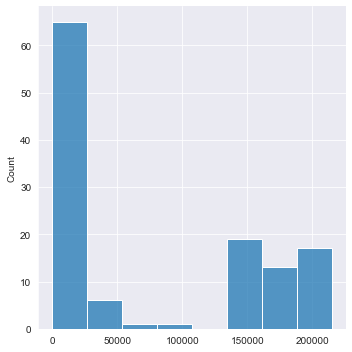

In [18]:
sns.displot(df.isnull(), x=df.isnull().sum())

## Fill Null values with Mean, median and Mode


In [19]:
#fill null values with mean,median ,mode
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)


In [20]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,9.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,9.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.0840

In [21]:
df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

In [22]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [23]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()



In [24]:
#fill null values with mean,median ,mode
for i in df.columns:
    if df[i].dtypes == 'object':
        # Encode labels in column 'species'.
        df[i]= label_encoder.fit_transform(df[i])
    else:
        pass





In [25]:
df['NAME_INCOME_TYPE'].value_counts()

7    158774
1     71617
3     55362
4     21703
6        22
5        18
0        10
2         5
Name: NAME_INCOME_TYPE, dtype: int64

In [26]:
for col in df.columns:
    if df[col].dtypes != object:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        llp = q1-1.5*IQR
        ulp = q3+1.5*IQR
        print('column name',col)
        print('mean:',df[col].mean())
        print('mode:',df[col].mode()[0])
        print('median:',df[col].median())
        print('skewness:',df[col].skew())
        print('kurtosis:',df[col].kurtosis())
        print('null_value count:',df[col].isnull().sum())
        print('\n')

column name SK_ID_CURR
mean: 278180.51857657125
mode: 100002
median: 278202.0
skewness: -0.0012002350768207104
kurtosis: -1.1989877778996432
null_value count: 0


column name TARGET
mean: 0.08072881945686496
mode: 0
median: 0.0
skewness: 3.0781586659196685
kurtosis: 7.475109389392569
null_value count: 0


column name NAME_CONTRACT_TYPE
mean: 0.09521285417432222
mode: 0
median: 0.0
skewness: 2.7582766561115473
kurtosis: 5.608126585922901
null_value count: 0


column name CODE_GENDER
mean: 0.3416690785045088
mode: 0
median: 0.0
skewness: 0.6680526870251536
kurtosis: -1.5526877166661923
null_value count: 0


column name FLAG_OWN_CAR
mean: 0.34010815873253314
mode: 0
median: 0.0
skewness: 0.6750151392718409
kurtosis: -1.5443646060846543
null_value count: 0


column name FLAG_OWN_REALTY
mean: 0.6936727466659729
mode: 1
median: 1.0
skewness: -0.8402925079761642
kurtosis: -1.293916916500171
null_value count: 0


column name CNT_CHILDREN
mean: 0.4170517477423572
mode: 0
median: 0.0
skewness: 1

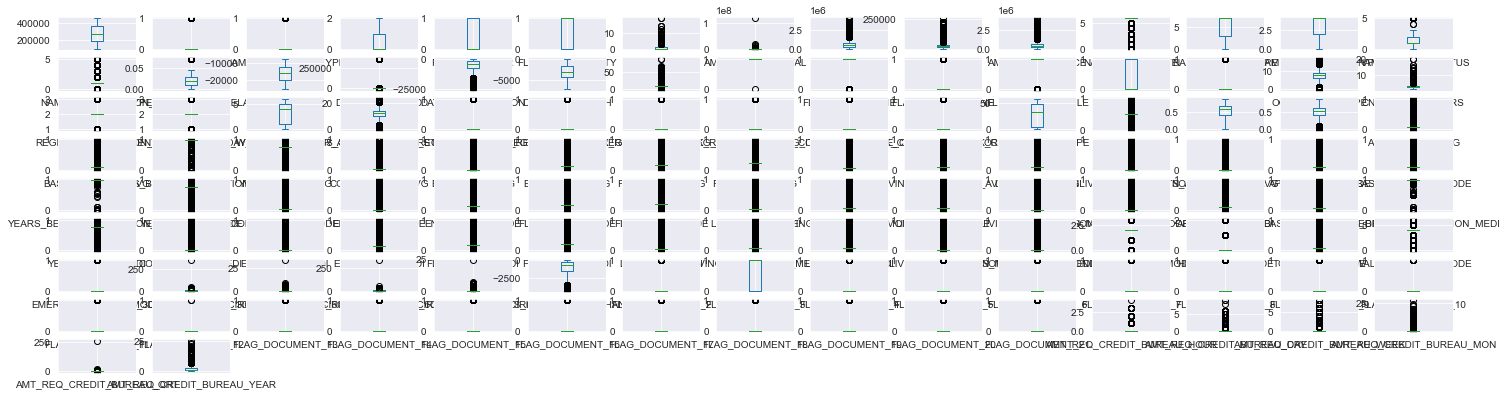

In [27]:
#checking outliers
#Outlier Search: This helps you to get some insights about the outliers in the data.
df.plot(kind='box', layout=(15,15),subplots=1,figsize=(25,11))
plt.show()



## Correlation

In [28]:
cor = df.corr()
cor

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000769,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000431,-0.000258,0.000954,-0.002112,-0.000529,0.002846,0.002191,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.001285,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,0.001439,-0.002895,-0.001075,-0.001138,0.002185,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.002269,0.000060,0.002319,0.000184,0.001366,-0.001221,0.001072,0.003421,-0.000622,0.003612,-0.001928,0.003550,0.001735,0.001069,0.001895,0.001512,-0.001444,0.002163,0.001649,-0.000793,0.001312,0.003043,-0.000403,0.003711,-0.001945,0.003233,0.001174,0.001127,0.002158,0.001776,-0.001087,0.001439,0.001675,-0.000949,0.000941,0.003350,-0.000393,0.003742,-0.001725,3.370552e-03,0.001597,0.001217,0.001980,0.001814,-0.001687,0.001774,-0.000136,0.001138,0.001861,-0.001808,0.002549,-0.001413,-0.000085,-0.001427,0.001182,-0.000859,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-8.146608e-04,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002517,-0.002066,0.001879,0.000328,0.000809,0.004071
TARGET,-0.002108,1.000000,-0.030896,0.054692,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012815,-0.039623,0.008319,0.046829,0.054699,-0.004127,0.034489,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.015982,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.017357,0.009308,0.058899,0.060893,0.004002,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.030765,-0.098887,-0.160295,-0.155892,-0.026734,-0.017634,-0.004665,-0.011281,-0.016194,-0.035853,-0.015984,-0.039385,-0.021158,-0.012047,-0.019262,-0.029464,-0.005910,-0.018187,-0.025418,-0.016136,-0.004061,-0.010648,-0.015238,-0.034220,-0.013515,-

## Heat Map

In [29]:
#sns.set(rc={'figure.figsize':(50,50)})
#ax = sns.heatmap(df.corr(), annot=True)
#plt.show()

## Transform

In [30]:
df = df[['CODE_GENDER','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'
,'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVINGAREA_MEDI','TARGET','AMT_CREDIT',
'AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE','NAME_CONTRACT_TYPE']]

In [31]:
cor = df.corr()
cor

,CODE_GENDER,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVINGAREA_MEDI,TARGET,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE
CODE_GENDER,1.000000,0.047403,0.065089,0.009554,0.058767,-0.017862,-0.017263,0.048237,0.137541,0.010457,0.054692,0.021572,0.076960,0.022495,0.065089,0.007177,-0.163879,-0.008613
CNT_CHILDREN,0.047403,1.000000,0.102547,-0.034128,0.021737,0.025423,0.024781,0.020072,0.070650,-0.014271,0.019187,0.002145,0.021377,-0.001856,0.102547,-0.007292,-0.144416,0.029998
NAME_INCOME_TYPE,0.065089,0.102547,1.000000,0.088298,0.035824,0.130969,0.121400,0.010664,0.102258,-0.059520,0.046829,-0.071794,-0.073018,-0.072458,1.000000,-0.029674,-0.176226,0.005428
NAME_EDUCATION_TYPE,0.009554,-0.034128,0.088298,1.000000,-0.017070,0.068567,0.071610,-0.019046,0.018578,-0.096668,0.054699,-0.120821,-0.141663,-0.133938,0.088298,-0.089428,0.092907,-0.065086
NAME_HOUSING_TYPE,0.058767,0.021737,0.035824,-0.017070,1.000000,0.020204,0.018166,0.136444,0.102682,-0.014968,0.034489,-0.054356,-0.033667,-0.055470,0.035824,0.012784,-0.068986,0.024190
REGION_RATING_CLIENT,-0.017862,0.025423,0.130969,0.068567,0.020204,1.000000,0.950842,0.035741,0.008360,-0.144401,0.058899,-0.101776,-0.128516,-0.103759,0.130969,-0.285699,0.063779,-0.021593
REGION_RATING_CLIENT_W_CITY,-0.017263,0.024781,0.121400,0.071610,0.018166,0.950842,1.000000,0.045669,0.028081,-0.162136,0.060893,-0.110915,-0.141674,-0.112185,0.121400,-0.264815,0.067335,-0.023116
REG_CITY_NOT_LIVE_CITY,0.048237,0.020072,0.010664,-0.019046,0.136444,0.035741,0.045669,1.000000,0.440409,-0.057231,0.044395,-0.026886,-0.006217,-0.027206,0.010664,0.016976,-0.058262,0.013586
REG_CITY_NOT_WORK_CITY,0.137541,0.070650,0.102258,0.018578,0.102682,0.008360,0.028081,0.440409,1.000000,-0.101558,0.050994,-0.018856,0.000894,-0.020348,0.102258,0.021504,-0.185604,0.004487
LIVINGAREA_MEDI,0.010457,-0.014271,-0.059520,-0.096668,-0.014968,-0.144401,-0.162136,-0.057231,-0.101558,1.000000,-0.029359,0.062258,0.077032,0.067199,-0.059520,0.073410,-0.031772,0.017425


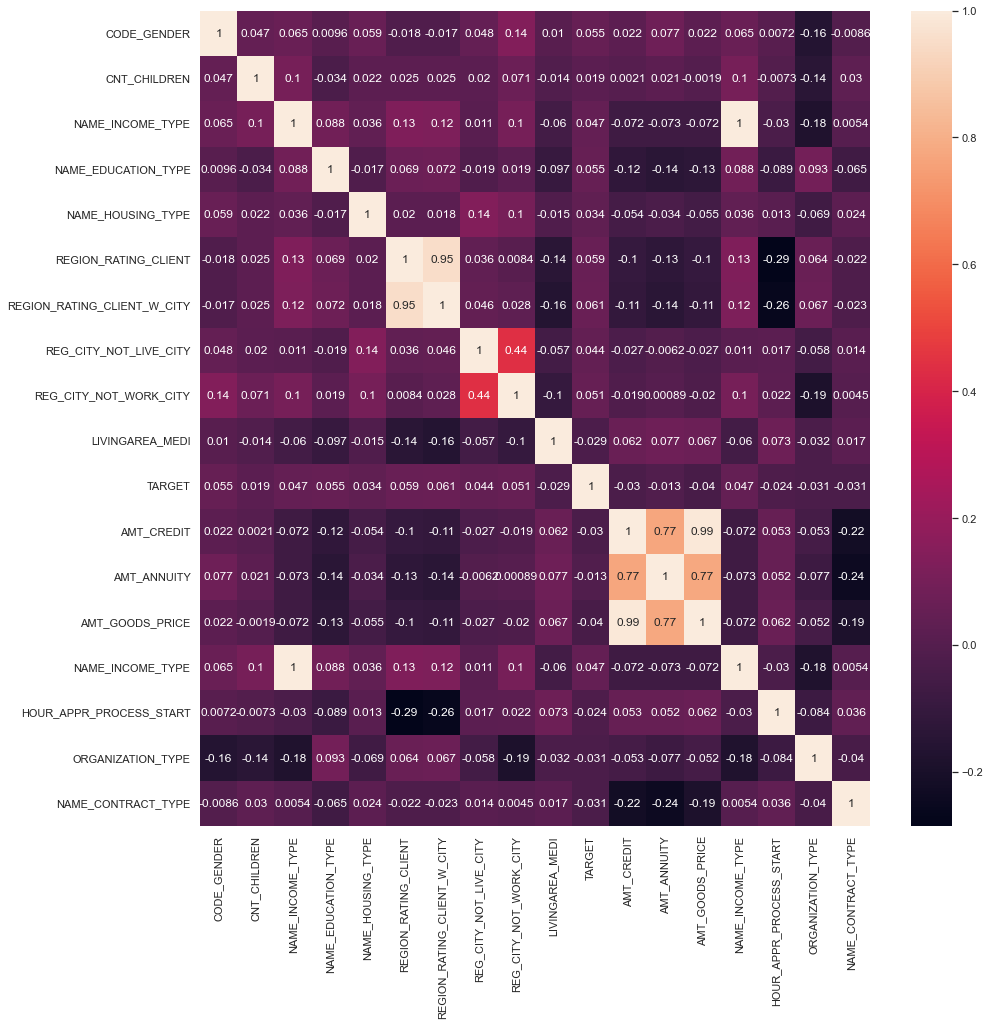

In [32]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

In [33]:
X = df.drop("TARGET",axis=1)
y = df.TARGET


In [34]:
X.shape

(307511, 17)

## Train, Test and Split

In [35]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, Normalizer
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#sc = StandardScaler()

#sc.fit(X_train)
#X_train = sc.transform(X_train)
#X_test = sc.transform(X_test)

X_train.shape,X_test.shape

((215257, 17), (92254, 17))

In [36]:

X_train

,CODE_GENDER,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVINGAREA_MEDI,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE
127044,0,0,1,1,1,1,1,0,0,0.0749,706410.0,67072.5,679500.0,1,13,43,0
281143,0,1,7,4,1,2,2,0,0,0.6939,545040.0,25407.0,450000.0,7,10,5,0
199799,1,1,7,4,2,2,2,0,0,0.6334,942300.0,27679.5,675000.0,7,10,42,0
306749,0,2,1,4,1,2,2,0,0,0.0195,180000.0,9000.0,180000.0,1,8,38,1
301347,0,0,3,4,1,1,1,0,0,0.0749,729792.0,37390.5,630000.0,3,10,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0,7,4,1,3,3,0,0,0.0749,675000.0,32602.5,675000.0,7,5,42,0
259178,0,2,1,4,1,3,3,0,0,0.0749,509922.0,40419.0,472500.0,1,12,51,0
131932,1,0,7,1,1,2,2,0,0,0.2334,1125000.0,33025.5,1125000.0,7,8,42,0
146867,1,1,7,4,1,2,1,0,1,0.2510,270000.0,13500.0,270000.0,7,11,4,1


In [37]:
X_test

,CODE_GENDER,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVINGAREA_MEDI,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE
245895,1,2,1,4,1,2,2,0,1,0.0749,465457.5,52641.0,418500.0,1,11,5,0
98194,0,0,1,1,1,3,3,0,0,0.0859,1281712.5,48946.5,1179000.0,1,10,5,0
36463,0,0,7,4,1,2,2,0,0,0.0749,495000.0,39109.5,495000.0,7,16,42,0
249923,0,0,4,4,1,1,1,0,0,0.1657,254700.0,24939.0,225000.0,4,14,5,0
158389,1,0,7,4,1,2,2,0,0,0.0762,308133.0,15862.5,234000.0,7,11,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211076,0,0,7,1,1,2,2,0,0,0.0749,1236816.0,36292.5,1080000.0,7,15,28,0
46231,1,0,3,4,1,2,2,0,0,0.2947,229500.0,16452.0,229500.0,3,12,57,0
242530,1,1,7,4,1,2,2,0,0,0.0650,178038.0,13905.0,162000.0,7,14,34,0
93958,0,0,3,4,1,2,2,0,0,0.2371,247500.0,12375.0,247500.0,3,12,57,1




## Random forest Classifier

Random forest is a type of Supervised Machine Learning Algorithm that is commonly used in classification and regression problems. It constructs decision trees from various samples and uses their majority vote for classification and average for regression.


In [38]:
# Applying random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_Classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_Classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [39]:
y_pred = rf_Classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import  confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[84396   445]
 [ 7330    83]]


0.9157218115203677

In [41]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     84841
           1       0.16      0.01      0.02      7413

    accuracy                           0.92     92254
   macro avg       0.54      0.50      0.49     92254
weighted avg       0.86      0.92      0.88     92254



In [42]:
X_test

,CODE_GENDER,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVINGAREA_MEDI,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE
245895,1,2,1,4,1,2,2,0,1,0.0749,465457.5,52641.0,418500.0,1,11,5,0
98194,0,0,1,1,1,3,3,0,0,0.0859,1281712.5,48946.5,1179000.0,1,10,5,0
36463,0,0,7,4,1,2,2,0,0,0.0749,495000.0,39109.5,495000.0,7,16,42,0
249923,0,0,4,4,1,1,1,0,0,0.1657,254700.0,24939.0,225000.0,4,14,5,0
158389,1,0,7,4,1,2,2,0,0,0.0762,308133.0,15862.5,234000.0,7,11,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211076,0,0,7,1,1,2,2,0,0,0.0749,1236816.0,36292.5,1080000.0,7,15,28,0
46231,1,0,3,4,1,2,2,0,0,0.2947,229500.0,16452.0,229500.0,3,12,57,0
242530,1,1,7,4,1,2,2,0,0,0.0650,178038.0,13905.0,162000.0,7,14,34,0
93958,0,0,3,4,1,2,2,0,0,0.2371,247500.0,12375.0,247500.0,3,12,57,1


## Naive Bayes Classifier

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gnb = GaussianNB()

In [45]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [46]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 92254 points : 7413


In [47]:
from sklearn.metrics import  confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)
#F1 score e cobertura (ingles)

[[84841     0]
 [ 7413     0]]


0.9196457606174258

In [48]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
TP = cm[0,0]
TN = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

In [50]:
acuracy = (TP+TN)/(TP+TN+FN+FP)
acuracy


0.9196457606174258

In [51]:
recall = TP/(TP+FN)
recall

0.9196457606174258

In [52]:
precision = TP/(TP+FP)
precision

1.0

In [53]:
f_score = 2*((precision*recall)/(precision+recall))
f_score

0.9581411107032948

In [54]:
from sklearn.model_selection import cross_val_score, GridSearchCV


In [55]:
parametros = {"var_smoothing":[0.0000000001,0.00000000001,0.00000000001,0.000000000001,0.0000000000001,0.000000000000001]}
busca = GridSearchCV(estimator=GaussianNB(),param_grid=parametros,scoring = 'accuracy')
busca.fit(X,y)
best_params = busca.best_params_
print(best_params)
melhor_modelo = busca.best_estimator_
score = busca.best_score_
print(score.round(5))

#lr_pred = melhor_modelo.predict(X_test)
#


{'var_smoothing': 1e-10}
0.91927


In [56]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
gnb2 = GaussianNB(var_smoothing= 1e-10)

In [58]:
y_pred2 = gnb2.fit(X_train, y_train).predict(X_test)

In [59]:
from sklearn.metrics import  confusion_matrix,accuracy_score,classification_report
cm2=confusion_matrix(y_test,y_pred2)
print(cm2)
print("a Acurácia é de: ",(accuracy_score(y_test,y_pred))*100," %")
#accuracy_score(y_test,y_pred2)
#F1 score e cobertura (ingles)



[[84841     0]
 [ 7413     0]]
a Acurácia é de:  91.96457606174258  %


In [60]:
cr2 = classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
TP = cm2[0,0]
TN = cm2[1,1]
FN = cm2[1,0]
FP = cm2[0,1]

In [62]:
acuracy2 = (TP+TN)/(TP+TN+FN+FP)
acuracy2


0.9196457606174258

# Naive Bayes With Pre Processing StandardScaler

In [63]:
'''
Todos os códigos desse Turing Talks foram feitos em cima de um Data Set de qualidade
de vinhos. O mesmo da imagem de dados desbalanceados no início do texto.
Link: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
'''

import numpy as np
import pandas as pd

!pip install imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection

# Random Undersampler
rus = RandomUnderSampler(random_state = 32)
X_rus_res, y_rus_res = rus.fit_resample(X, y)

# NearMiss
nm = NearMiss(version=1)
X_nm_res, y_nm_res = nm.fit_resample(X, y)

# OneSidedSelection (Algoritmo tipo KNN)
#oss = OneSidedSelection(random_state = 32)
#X_oss_res, y_oss_res = oss.fit_resample(X, y)

from imblearn.over_sampling import RandomOverSampler, SMOTE

# Random Oversampler
ros = RandomOverSampler(random_state = 32)
X_ros_res, y_ros_res = ros.fit_resample(X, y)

#SMOTE
smote = SMOTE(random_state = 32)
X_smote_res, y_smote_res = smote.fit_resample(X, y)

# RandomUnderSampler_result

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
X_train,X_test,y_train,y_test=train_test_split(X_rus_res, y_rus_res,test_size=0.3,random_state=42)

sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train.shape,X_test.shape

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.

kfold  = KFold(n_splits=5, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
RandomUnderSampler_result = cross_val_score(gnb, X_test, y_test, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(RandomUnderSampler_result))
print("Mean R^2 RandomUnderSampler for Cross-Validation K-Fold: {0}".format(RandomUnderSampler_result.mean()))


K-Fold (R^2) Scores: [0.58341725 0.58173884 0.58610272 0.58274589 0.60993622]
Mean R^2 RandomUnderSampler for Cross-Validation K-Fold: 0.5887881839543472


# NearMiss_result

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
X_train,X_test,y_train,y_test=train_test_split(X_nm_res, y_nm_res,test_size=0.3,random_state=42)

sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train.shape,X_test.shape

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.

kfold  = KFold(n_splits=5, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
NearMiss_result = cross_val_score(gnb, X_test, y_test, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(NearMiss_result))
print("Mean R^2 RandomUnderSampler for Cross-Validation K-Fold: {0}".format(NearMiss_result.mean()))


K-Fold (R^2) Scores: [0.67875126 0.66263847 0.65928164 0.66834508 0.67438738]
Mean R^2 RandomUnderSampler for Cross-Validation K-Fold: 0.6686807653575025


# RandomOverSampler_result

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
X_train,X_test,y_train,y_test=train_test_split(X_ros_res, y_ros_res,test_size=0.3,random_state=42)

sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train.shape,X_test.shape

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.

kfold  = KFold(n_splits=5, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
RandomOverSampler_result = cross_val_score(gnb, X_test, y_test, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(RandomOverSampler_result))
print("Mean R^2 RandomUnderSampler for Cross-Validation K-Fold: {0}".format(RandomOverSampler_result.mean()))


K-Fold (R^2) Scores: [0.59328479 0.59720544 0.59436354 0.59171039 0.59159248]
Mean R^2 RandomUnderSampler for Cross-Validation K-Fold: 0.5936313278095167


# SMOTE

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
X_train,X_test,y_train,y_test=train_test_split(X_smote_res, y_smote_res,test_size=0.3,random_state=42)

sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train.shape,X_test.shape

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.

kfold  = KFold(n_splits=5, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
SMOTE_result = cross_val_score(gnb, X_test, y_test, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(SMOTE_result))
print("Mean R^2 RandomUnderSampler for Cross-Validation K-Fold: {0}".format(SMOTE_result.mean()))


K-Fold (R^2) Scores: [0.63196062 0.63437786 0.62997465 0.62634868 0.62944402]
Mean R^2 RandomUnderSampler for Cross-Validation K-Fold: 0.6304211642092306


In [68]:
# Creates a dictionary to store Linear Models.
dic_models = {
    "LinearRegression": RandomUnderSampler_result.mean(),
    "ElasticNet": NearMiss_result.mean(),
    "Ridge": RandomOverSampler_result.mean(),
    "Lasso": SMOTE_result.mean()
}
# Select the best model.
bestModel = max(dic_models, key=dic_models.get)

print("Linear Regression Mean (R^2): {0}\nElastic Net Mean (R^2): {1}\nRidge Mean (R^2): {2}\nLasso Mean (R^2): {3}".format(RandomUnderSampler_result.mean(), NearMiss_result.mean(), RandomOverSampler_result.mean(), SMOTE_result.mean()))
print("The best model is: {0} with value: {1}".format(bestModel, dic_models[bestModel]))



Linear Regression Mean (R^2): 0.5887881839543472
Elastic Net Mean (R^2): 0.6686807653575025
Ridge Mean (R^2): 0.5936313278095167
Lasso Mean (R^2): 0.6304211642092306
The best model is: ElasticNet with value: 0.6686807653575025


In [69]:
# restante do código
from sklearn.model_selection import cross_val_score
medias = cross_val_score(gnb, X_test, y_test, cv=5)
media = sum(medias) / len(medias)
media

0.6306570297757763

In [70]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 169612 points : 62447


In [71]:
from sklearn.metrics import  confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("a Acurácia é de: ",(accuracy_score(y_test,y_pred))*100," %")
#accuracy_score(y_test,y_pred)
#F1 score e cobertura (ingles)

[[40835 44010]
 [18437 66330]]
a Acurácia é de:  63.18243992170365  %


In [72]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.48      0.57     84845
           1       0.60      0.78      0.68     84767

    accuracy                           0.63    169612
   macro avg       0.65      0.63      0.62    169612
weighted avg       0.65      0.63      0.62    169612



In [73]:
TP = cm[0,0]
TN = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

In [74]:
acuracy = (TP+TN)/(TP+TN+FN+FP)
acuracy


0.6318243992170365

In [75]:
recall = TP/(TP+FN)
recall

0.6889425023619922

In [76]:
precision = TP/(TP+FP)
precision

0.481289410100772

In [77]:
f_score = 2*((precision*recall)/(precision+recall))
f_score

0.5666923402513235

In [78]:
from sklearn.model_selection import cross_val_score, GridSearchCV


In [79]:
parametros = {"var_smoothing":[0.0000000001,0.00000000001,0.00000000001,0.000000000001,0.0000000000001,0.000000000000001]}
busca = GridSearchCV(estimator=GaussianNB(),param_grid=parametros,scoring = 'accuracy')
busca.fit(X_rus_res,y_rus_res)
best_params = busca.best_params_
print(best_params)
melhor_modelo = busca.best_estimator_
score = busca.best_score_
print(score.round(5))

#lr_pred = melhor_modelo.predict(X_test)
#


{'var_smoothing': 1e-13}
0.59039


In [80]:
y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [81]:
gnb2 = GaussianNB(var_smoothing= 1e-10)

In [82]:
y_pred2 = gnb2.fit(X_train, y_train).predict(X_test)

In [83]:
from sklearn.metrics import  confusion_matrix,accuracy_score,classification_report
cm2=confusion_matrix(y_test,y_pred2)
print(cm2)
accuracy_score(y_test,y_pred2)
#F1 score e cobertura (ingles)



[[40835 44010]
 [18437 66330]]


0.6318243992170365

In [84]:
cr2 = classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.69      0.48      0.57     84845
           1       0.60      0.78      0.68     84767

    accuracy                           0.63    169612
   macro avg       0.65      0.63      0.62    169612
weighted avg       0.65      0.63      0.62    169612



In [85]:
TP = cm2[0,0]
TN = cm2[1,1]
FN = cm2[1,0]
FP = cm2[0,1]

In [86]:
acuracy2 = (TP+TN)/(TP+TN+FN+FP)
acuracy2


0.6318243992170365